In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from keras import regularizers
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error

In [62]:
BitCoin = pd.read_csv('1_Bitcoin.csv')
BitCoin=BitCoin.applymap(lambda x: x.replace('$',''))
BitCoin=BitCoin.applymap(lambda x: x.replace(',',''))
cl = ['Open*', 'High', 'Low', 'Close**', 'Volume', 'Market Cap']
for c in cl:
    BitCoin[c] = BitCoin[c].astype(float)
BitCoin = BitCoin.rename(columns={'Open*': 'Open', 'Close**': 't-4'})
BitCoin['t-3']= BitCoin['t-4'].shift(1)
BitCoin['t-2']= BitCoin['t-4'].shift(2)
BitCoin['t-1']= BitCoin['t-4'].shift(3)
BitCoin['t']= BitCoin['t-4'].shift(4)
BitCoin['Target']= BitCoin['t-4'].shift(5)
# BitCoin.corr()
BitCoin = BitCoin[::-1]

BitCoin.head(10)

,Date,Open,High,Low,t-4,Volume,Market Cap,t-3,t-2,t-1,t,Target
3041,Jul 02 2013,88.05,92.30,87.51,90.13,0.0,1.024082e+09,77.53,80.53,68.43,70.28,74.56
3040,Jul 03 2013,90.40,90.98,76.98,77.53,0.0,8.812331e+08,80.53,68.43,70.28,74.56,76.52
3039,Jul 04 2013,78.89,83.11,72.00,80.53,0.0,9.156186e+08,68.43,70.28,74.56,76.52,76.69
3038,Jul 05 2013,79.99,80.00,65.53,68.43,0.0,7.784112e+08,70.28,74.56,76.52,76.69,86.76
3037,Jul 06 2013,68.50,75.00,66.82,70.28,0.0,7.997416e+08,74.56,76.52,76.69,86.76,88.98
3036,Jul 07 2013,68.75,74.56,66.62,74.56,0.0,8.488390e+08,76.52,76.69,86.76,88.98,93.59
3035,Jul 08 2013,76.50,80.00,72.60,76.52,0.0,8.714579e+08,76.69,86.76,88.98,93.59,98.13
3034,Jul 09 2013,76.00,78.30,72.52,76.69,0.0,8.738418e+08,86.76,88.98,93.59,98.13,94.69
3033,Jul 10 2013,76.72,87.00,76.20,86.76,0.0,9.889577e+08,88.98,93.59,98.13,94.69,98.40
3032,Jul 11 2013,88.00,90.28,85.08,88.98,0.0,1.014650e+09,93.59,98.13,94.69,98.40,97.45


In [63]:
BitCoin[2740:2741]

,Date,Open,High,Low,t-4,Volume,Market Cap,t-3,t-2,t-1,t,Target
301,Jan 01 2021,28994.01,29600.63,28803.59,29374.15,4.073030e+10,5.460016e+11,32127.27,32782.02,31971.91,33992.43,36824.36


In [64]:
BitCoin.columns

Index(['Date', 'Open', 'High', 'Low', 't-4', 'Volume', 'Market Cap', 't-3',
       't-2', 't-1', 't', 'Target'],
      dtype='object')

In [65]:
Train_split = int(0.6*len(BitCoin))
Test_split = int(0.8*len(BitCoin))
# predictor = [ 'Open', 'High', 'Low', 'Volume', 't-4',  't-3', 't-2', 't-1', 't']
predictor = [ 'Volume', 't-4',  't-3', 't-2', 't-1', 't']

X_train = np.array(BitCoin[predictor][:Train_split])
y_train = np.array(BitCoin['Target'][:Train_split]).reshape(-1,1)

X_test = np.array(BitCoin[predictor][Test_split:-5])
y_test = np.array(BitCoin['Target'][Test_split:-5]).reshape(-1,1)

In [66]:
# Fit a linear regression model with intercept (\beta_0 is not zero)
reg = LinReg(fit_intercept=True).fit(X_train, y_train)

# Print the coefficients:
print("The coefficient of the uni-variant model is: ",reg.coef_)
print("The intercept is: ",reg.intercept_)

The coefficient of the uni-variant model is:  [[-3.26435202e-08  9.62099219e-02 -5.06894019e-02  2.71402126e-02
  -1.24332217e-01  1.07759014e+00]]
The intercept is:  [-7.50702727]


In [67]:
y_pred = reg.predict(X_test).reshape(-1,1)

In [68]:
MAPE = abs((y_pred[:-1]-y_test[:-1])/y_test[:-1]).mean()
print("The mean absolute percentage error for the multi-variant linear regression is: %2f"%(MAPE))

The mean absolute percentage error for the multi-variant linear regression is: 0.062750


In [69]:
BitCoin.corr()

,Open,High,Low,t-4,Volume,Market Cap,t-3,t-2,t-1,t,Target
Open,1.000000,0.999501,0.999084,0.998793,0.773901,0.998580,0.997707,0.996540,0.995330,0.994006,0.992630
High,0.999501,1.000000,0.999024,0.999492,0.776444,0.999223,0.998326,0.997166,0.995978,0.994778,0.993435
Low,0.999084,0.999024,1.000000,0.999378,0.767244,0.999244,0.998168,0.997131,0.995983,0.994821,0.993419
t-4,0.998793,0.999492,0.999378,1.000000,0.772374,0.999782,0.998793,0.997702,0.996537,0.995330,0.994007
Volume,0.773901,0.776444,0.767244,0.772374,1.000000,0.772032,0.772629,0.771349,0.772497,0.771675,0.772616
Market Cap,0.998580,0.999223,0.999244,0.999782,0.772032,1.000000,0.998600,0.997535,0.996392,0.995211,0.993916
t-3,0.997707,0.998326,0.998168,0.998793,0.772629,0.998600,1.000000,0.998793,0.997702,0.996536,0.995329
t-2,0.996540,0.997166,0.997131,0.997702,0.771349,0.997535,0.998793,1.000000,0.998792,0.997702,0.996536
t-1,0.995330,0.995978,0.995983,0.996537,0.772497,0.996392,0.997702,0.998792,1.000000,0.998792,0.997701
t,0.994006,0.994778,0.994821,0.995330,0.771675,0.995211,0.996536,0.997702,0.998792,1.000000,0.998792


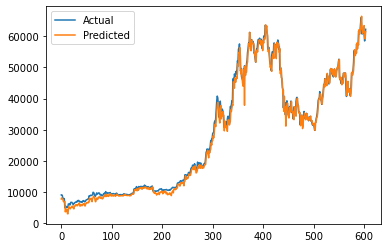

In [55]:
date = np.array(BitCoin[2443:]['Date'])
x_axis = date
plt.plot(x_axis, y_test_invesre, label='Actual')
plt.plot(x_axis, y_test_pred_inverse, label='Predicted')
plt.tick_params(axis = 'x', labelsize = 6)
plt.tick_params(axis = 'y', labelsize = 8)
plt.xlabel('Testing Sample Date')
plt.ylabel('BitCoin Price $USD')
plt.title("LSTM Prediction Performance")
plt.legend()
plt.show()

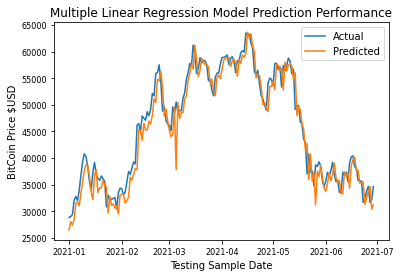

In [76]:
BitCoin['Date']=pd.to_datetime(BitCoin['Date'])
date = np.array(BitCoin[2740:2920]['Date'])
x_axis = date
plt.plot(x_axis, y_test[300:480], label='Actual')
plt.plot(x_axis, y_pred[300:480], label='Predicted')
plt.tick_params(axis = 'x', labelsize = 8)
plt.tick_params(axis = 'y', labelsize = 8)
plt.xlabel('Testing Sample Date')
plt.ylabel('BitCoin Price $USD')
plt.title("Multiple Linear Regression Model Prediction Performance")
plt.legend()
plt.show()

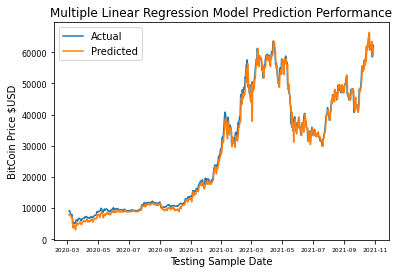

In [80]:
date = np.array(BitCoin[2438:]['Date'])
x_axis = date
plt.plot(x_axis, y_test, label='Actual')
plt.plot(x_axis, y_pred, label='Predicted')
plt.tick_params(axis = 'x', labelsize = 6)
plt.tick_params(axis = 'y', labelsize = 8)
plt.xlabel('Testing Sample Date')
plt.ylabel('BitCoin Price $USD')
plt.title("Multiple Linear Regression Model Prediction Performance")
plt.legend()
plt.show()

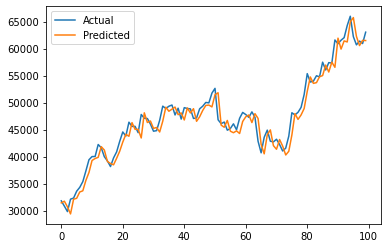

In [13]:
x_axis = np.arange(len(y_test[500:600]))
plt.plot(x_axis, y_test[500:600], label='Actual')
plt.plot(x_axis, y_pred[500:600], label='Predicted')
plt.legend()
plt.show()